In [1]:
import time
import random
import math
import array
import pandas as pd
#from threading import Thread 
from AutoCircleCopyRS import move_circle
from move_by_XY import moveXY
from CenterPiezoRS import center_piezo
from GrabLocation import grab_location
#from BlasterDatacollection import dataB
from Movements import move_negB,move_posB,move_negA,move_posA

<IPython.core.display.Javascript object>

In [2]:
trials = input('Enter number of trials:')
name = 'PrecisionXYTestNC'
t = time.localtime()
current_time = time.strftime('_%Y%m%d_%H%M%S', t)
name = name+current_time
print(name)
x = 0
y = 0

Enter number of trials:10
PrecisionXYTestNC_20230119_143758


In [3]:
#generate random destination
circle_r = 1.75 #radius of the circle
circle_x = 5.415049495711354 #center of the circle
circle_y = 6.654107624668449
alpha = 2 * math.pi * random.random() #random angle
r = circle_r * math.sqrt(random.random()) #random radius
randx = r * math.cos(alpha) + circle_x #calculating coordinates
randy = r * math.sin(alpha) + circle_y
print("Random point within max range:", (randx, randy))
dict = {'X': [randx], 'Y': [randy]}
df = pd.DataFrame(dict)
df.to_csv('.\Results\%s.csv' % name, mode='a', index=False, header=False)

Random point within max range: (4.493560548430304, 7.595519809264081)


<IPython.core.display.Javascript object>

,original_pos_xy,Final_pos_xy,max_xy,min_xy,Radius_x,Radius_y,Area
0,"(4.4574, 7.5118)","([4.4206], [7.475])","(4.4574, 7.5118)","(4.4206, 7.475)",0.0184,0.0184,0.115552


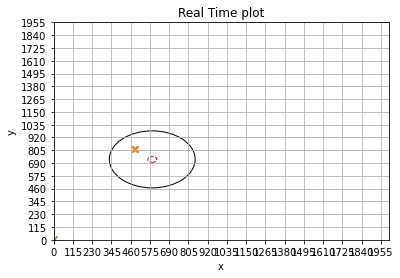

AutoTest complete.


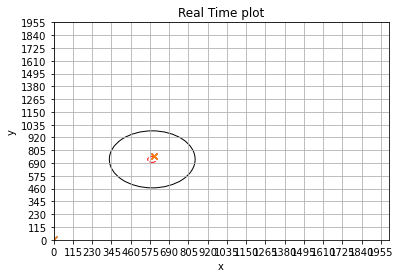

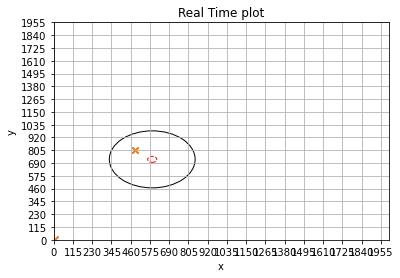

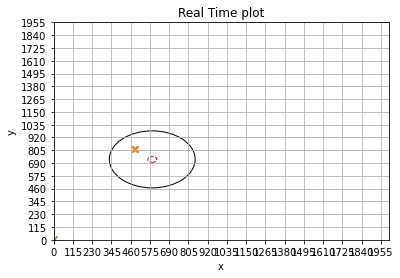

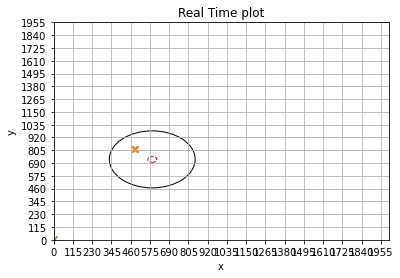

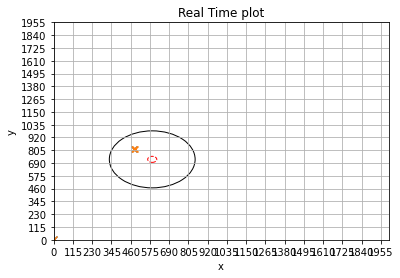

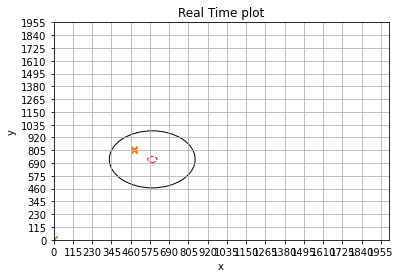

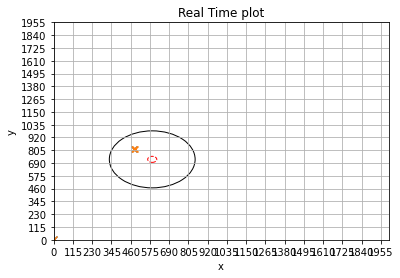

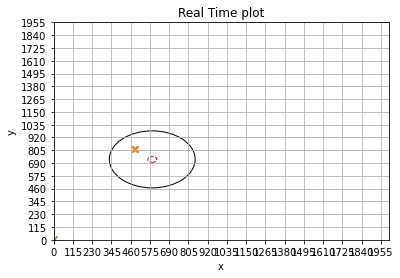

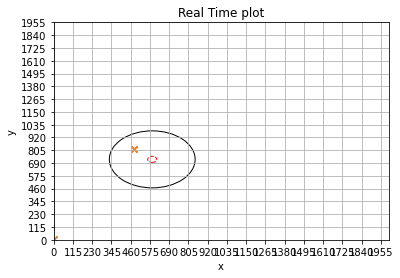

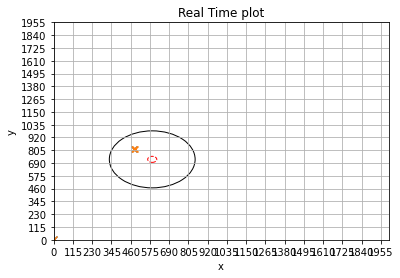

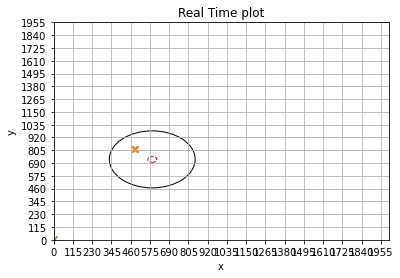

In [4]:
center_piezo() #send the piezo back to the center
x, y = grab_location(name) #add new location to CSV

#loop through the test for n trials, unless condition met
destx = randx
desty = randy
n = 1 
while n <= int(trials):
    print('trial #',n)
    
    dx = float(destx) - x
    dy = float(desty) - y
    
    moveXY(dx,dy) #try to move to destination
    x,y = grab_location(name)
        
    n += 1
    
    if (randx-.05) <= x <= (randx+.05) and (randy-.05) <= y <= (randy+.05): #check if destination reached
        print("Win condition met.")
        break
    
else:
    print('AutoTest complete.')